In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Youth_Tobacco_Survey__YTS__Data.csv')
df

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,2002,KS,Kansas,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.3477403, -98.200781227)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
10596,2015,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,2EDU,YTS09,9
10597,2010,WI,Wisconsin,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(44.393191174, -89.816370742)",BEH,105BEH,169QUA,3GEN,8AGE,6RAC,1EDU,YTS06,6
10598,2009,LA,Louisiana,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(31.312660644, -92.445680071)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS07,7


In [3]:
df.rename(columns={'Data_Value': 'Tobacco consumption percentage (%)'}, inplace=True)

In [4]:
df = df[['TopicDesc',
       'Response', 'Tobacco consumption percentage (%)', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender',
       'Education', 'DisplayOrder']]

In [5]:
#Loại bỏ những hàng chứa dữ  liệu trống
df.dropna(subset=['Tobacco consumption percentage (%)', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 
                   'High_Confidence_Limit', 'Sample_Size'], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4540\2058252032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Tobacco consumption percentage (%)', 'Data_Value_Std_Err', 'Low_Confidence_Limit',


In [6]:
#Thuộc tính phân loại
categorical_features = ['Education', 'Gender', 'Response']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [7]:
categorical_columns = ['Education_Middle School', 'Gender_Male', 'Gender_Overall','Response_Ever', 'Response_Frequent']
df[categorical_columns] = df[categorical_columns].astype(int)

In [8]:
#Split data set
X = df[['Tobacco consumption percentage (%)','Data_Value_Std_Err','Low_Confidence_Limit','High_Confidence_Limit','Sample_Size',
        'Education_Middle School', 'Gender_Male', 'Gender_Overall','Response_Ever', 'Response_Frequent']]

# X = df[['Tobacco consumption percentage (%)','Data_Value_Std_Err','Sample_Size']]
y = df['TopicDesc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [9]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1,n_estimators=100,random_state=42)

In [11]:
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [12]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred

array(['Smokeless Tobacco Use (Youth)', 'Cessation (Youth)',
       'Smokeless Tobacco Use (Youth)', ..., 'Cigarette Use (Youth)',
       'Smokeless Tobacco Use (Youth)', 'Cigarette Use (Youth)'],
      dtype=object)

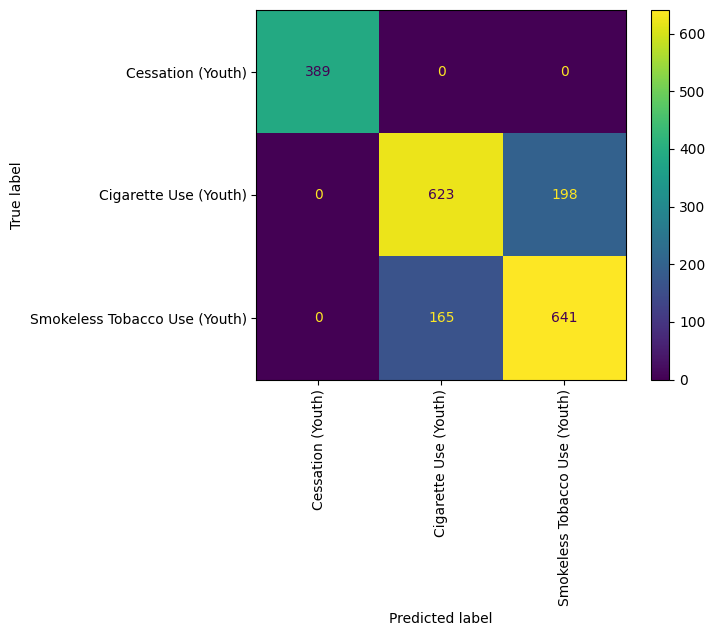

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
# Evaluate Model
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
index = ['Actual TopicDesc']
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Cessation (Youth)', 'Cigarette Use (Youth)', 'Smokeless Tobacco Use (Youth)'])
cm_display.plot()
plt.xticks(rotation=90)
plt.show()

In [14]:
# Kiểm tra thứ tự các nhãn mà mô hình sử dụng
labels = model.classes_
print(labels)

['Cessation (Youth)' 'Cigarette Use (Youth)'
 'Smokeless Tobacco Use (Youth)']



Feature Importances:
                              Feature  Importance
1                  Data_Value_Std_Err    0.005456
7                      Gender_Overall    0.017212
6                         Gender_Male    0.027877
4                         Sample_Size    0.028522
3               High_Confidence_Limit    0.034201
2                Low_Confidence_Limit    0.041369
5             Education_Middle School    0.044841
9                   Response_Frequent    0.045387
0  Tobacco consumption percentage (%)    0.067014
8                       Response_Ever    0.174529


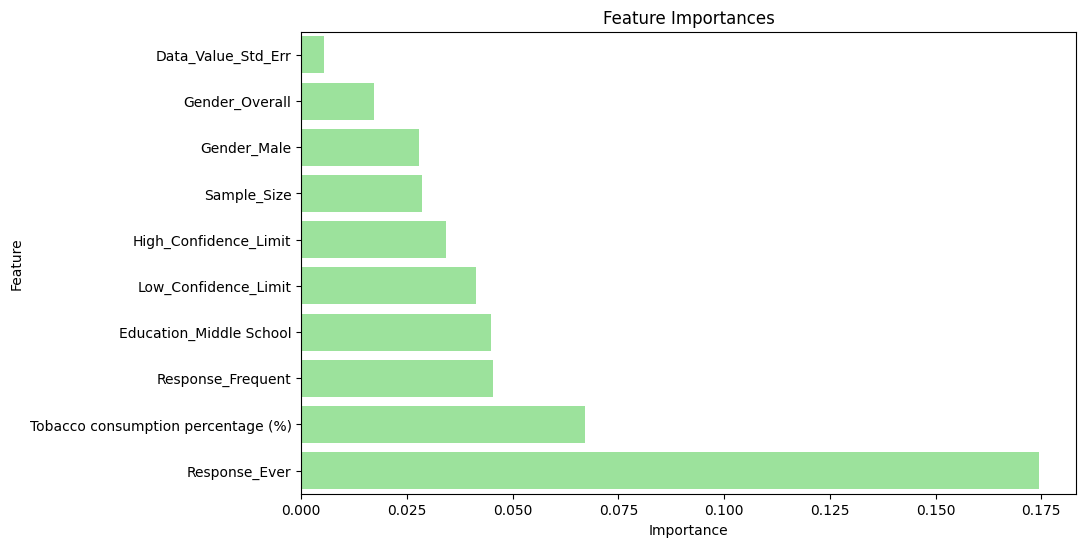

In [15]:
from sklearn.inspection import permutation_importance
import seaborn as sns

result = permutation_importance(model, X_test, y_test, n_repeats=20, random_state=0)

# Tạo DataFrame để biểu diễn tầm quan trọng của các đặc trưng
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})

# Sắp xếp thuộc tính theo mức độ đặc trưng
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# In ra thuộc tính đặc trưng
print('\nFeature Importances:')
print(importance_df)

# Vẽ plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', color='lightgreen')
plt.title('Feature Importances')
plt.show()

In [16]:
print(accuracy_score(y_test, y_pred))

0.8199404761904762


In [17]:
#Split data set
X = df[['Tobacco consumption percentage (%)', 'Education_Middle School', 'Response_Ever', 'Response_Frequent']]

y = df['TopicDesc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1,n_estimators=100,random_state=42)

In [20]:
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [21]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred

array(['Cigarette Use (Youth)', 'Cessation (Youth)',
       'Smokeless Tobacco Use (Youth)', ..., 'Cigarette Use (Youth)',
       'Smokeless Tobacco Use (Youth)', 'Smokeless Tobacco Use (Youth)'],
      dtype=object)

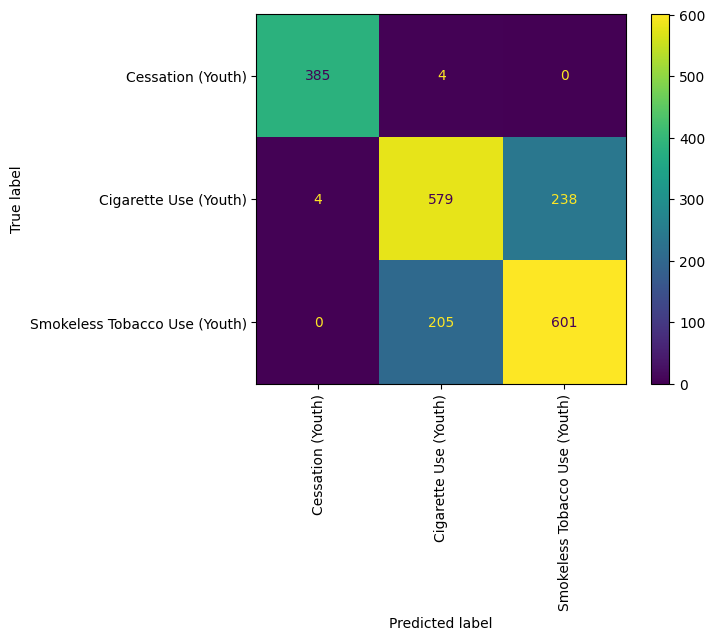

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
# Evaluate Model
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
index = ['Actual TopicDesc']
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Cessation (Youth)', 'Cigarette Use (Youth)', 'Smokeless Tobacco Use (Youth)'])
cm_display.plot()
plt.xticks(rotation=90)
plt.show()

In [23]:
print(accuracy_score(y_test, y_pred))

0.7762896825396826


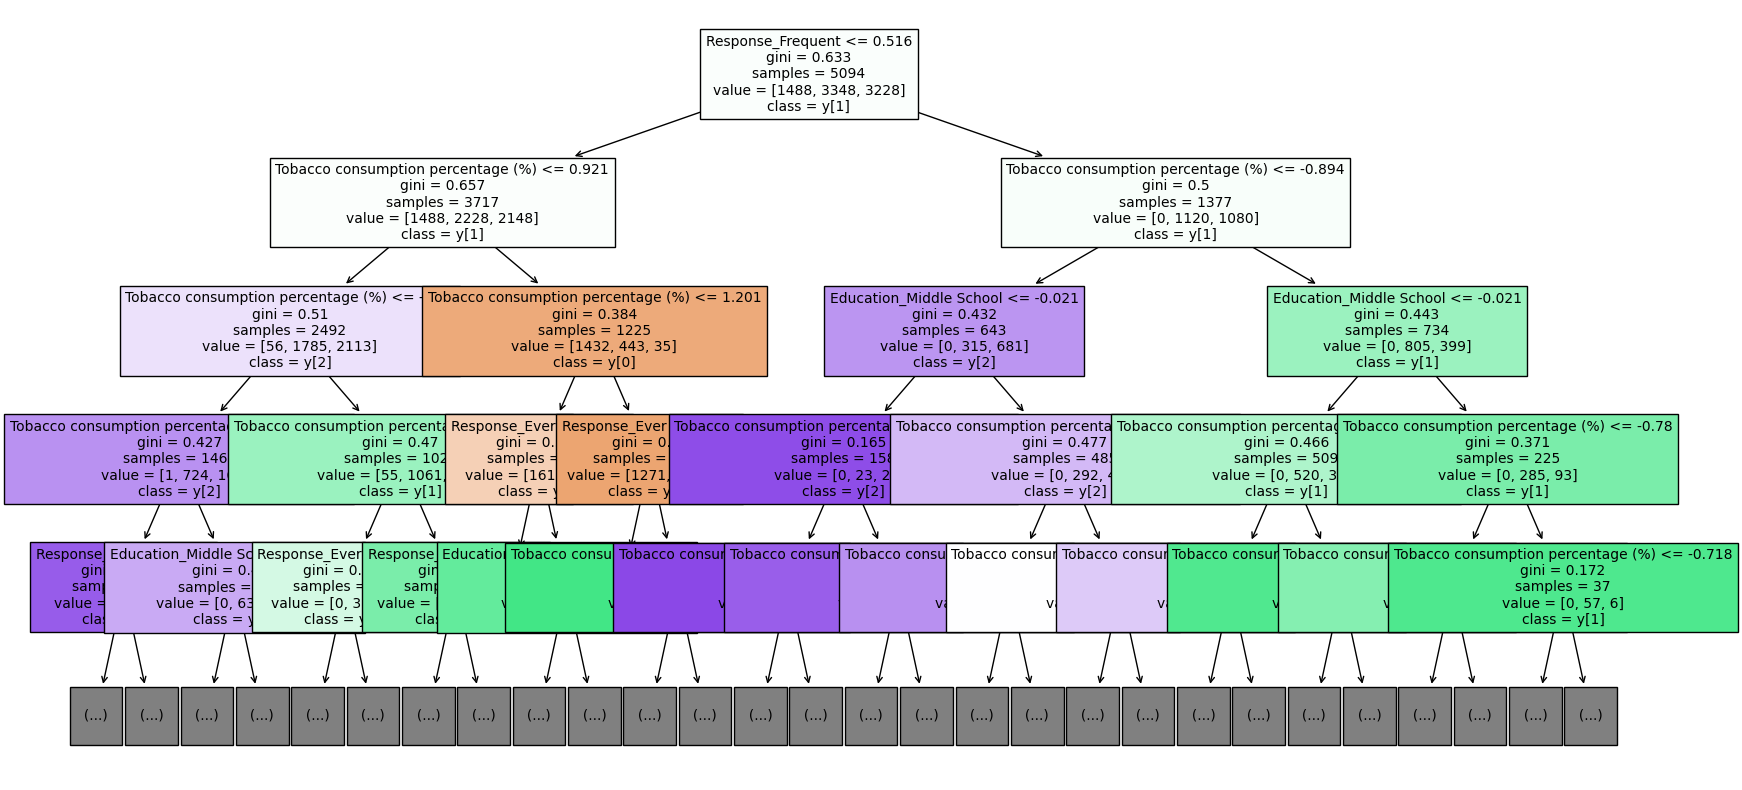

In [24]:
from sklearn.tree import plot_tree

tree = model.estimators_[0]
column_names = ['Tobacco consumption percentage (%)','Education_Middle School','Response_Ever','Response_Frequent']
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(tree, max_depth=4, fontsize=10, feature_names=column_names, class_names=True, filled=True, ax=ax)
plt.show()